In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import preprocessing

In [2]:
# machine learning model input must be numbers   
# null value must be excluded
# cleaning of dataset 



In [3]:
# read data set
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# describe the dataset
print("the number of points in this dataset =",train_df.shape[1])

the number of points in this dataset = 12


In [3]:
print(train_df.shape[0])

891


# Data Quality and missing values investigation  (1'st  step of preprocessing)

In [4]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# let's work on the age feature:
    -first we need to percentage of missing values.
    - draw a histogram to find the most acceptiable value

In [32]:
cont=train_df.describe().columns.to_list()
cat=train_df.describe(include="O").columns.to_list()
cont,cat

(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'],
 ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'])

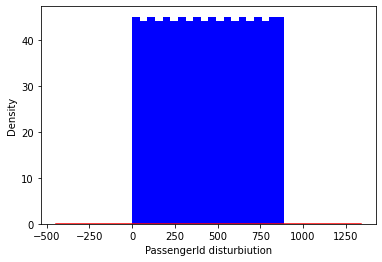

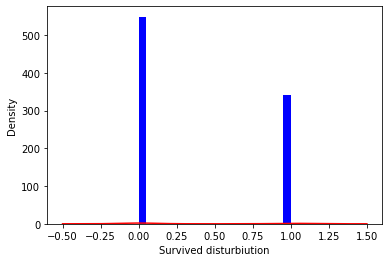

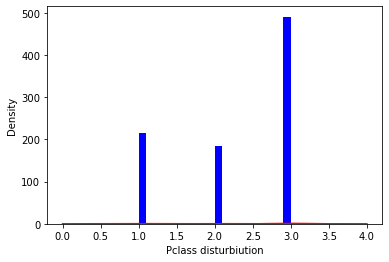

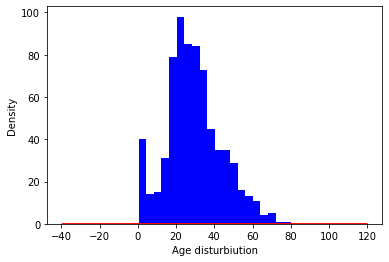

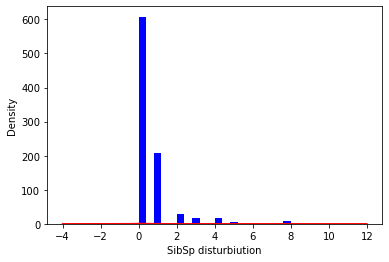

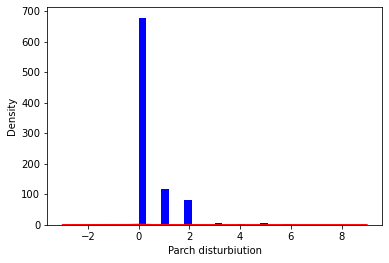

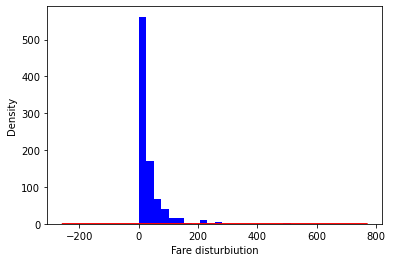

In [34]:
# univariante analysis
# continous variable ===> histogram  ,density  plot
# age right skewed so we need to impute the null values with median
# despite of fare has no nulls there is many missing data 
# survived feature is categorical feature

for i in cont:
    ax=train_df[i].hist(bins=20,density=False,color='blue',stacked=True)
    train_df[i].plot(kind='density',color='red')
    ax.set(xlabel=i+' disturbiution')
    plt.show()

In [9]:
# percent of m.v
print(train_df["Age"].isnull().sum()/train_df.shape[0])

0.19865319865319866


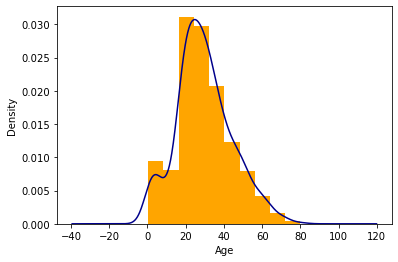

In [6]:
ax=train_df["Age"].hist(bins=10,density=True,color="orange",stacked=True)
train_df["Age"].plot(kind="density",color="darkblue")
ax.set(xlabel="Age")
plt.show()

In [7]:
print(train_df["Age"].mean(),train_df["Age"].median())

29.69911764705882 28.0


In [8]:
print(train_df["Cabin"].isnull().sum()/train_df.shape[0])
# 

0.7710437710437711


# conculstion

we find that the percentage of missing values is very high so we need to drop the cabin column


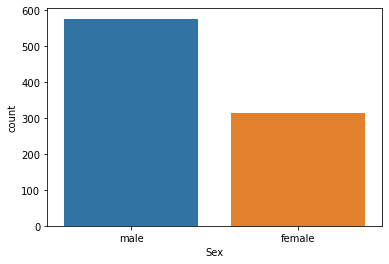

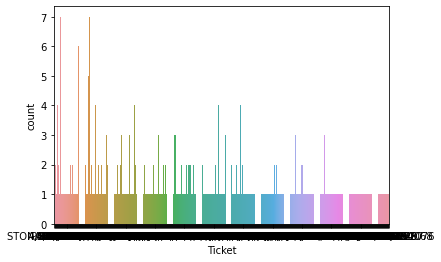

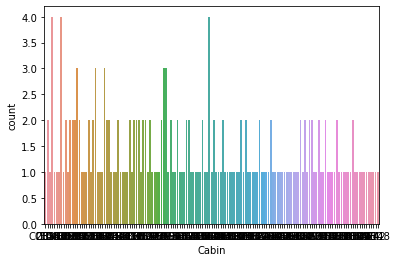

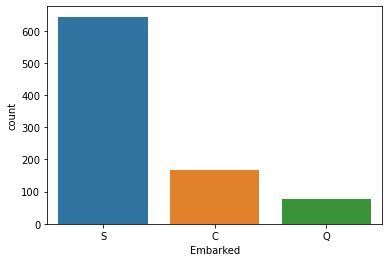

In [36]:
# we found that the [Ticket,cabin] features  aren't categorical in this dataset
cat=['Sex', 'Embarked']

for i in cat:
    train_df[i].value_counts()
    sns.countplot(x=i,data=train_df)
    plt.show()

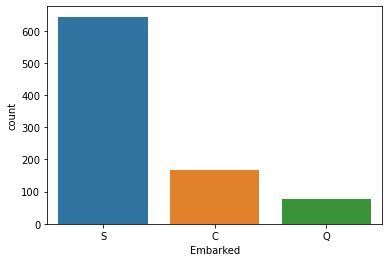

In [9]:
train_df["Embarked"].value_counts()
sns.countplot(x="Embarked",data=train_df)
plt.show()

In [54]:
# EDA ' univariante analysis'
# impute missing values dataset 
train_data=train_df.copy()
train_data.Age.fillna(train_data.Age.median(),inplace=True)
train_data.Embarked.fillna(train_df.Embarked.value_counts().idxmax,inplace=True)
train_data.drop(['Cabin','Name','PassengerId'],axis=1,inplace=True)

In [10]:
train_df["Embarked"].value_counts().idxmax()

'S'

In [11]:
train_data=train_df.copy()
train_data["Age"].fillna(train_df["Age"].median(),inplace=True)
train_data["Embarked"].fillna(train_data["Embarked"].value_counts().idxmax(),inplace=True)
train_data.drop("Cabin",axis=1,inplace=True)

In [55]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [13]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [57]:
# train_data['Not_Alone']=np.where((train_data['SibSp']+train_data['Parch'])>0,1,0)
# train_data.drop(['SibSp','Parch'],axis=1,inplace=True)
train_data.drop('Ticket',axis=1,inplace=True)
train_data.head()



,Survived,Pclass,Sex,Age,Fare,Embarked,Not_Alone
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [60]:
train_data=pd.get_dummies(train_data,columns=["Pclass","Sex","Embarked"])


Survived                                                                                               0
Age                                                                                                    0
Fare                                                                                                   0
Not_Alone                                                                                              0
Pclass_1                                                                                               0
Pclass_2                                                                                               0
Pclass_3                                                                                               0
Sex_female                                                                                             0
Sex_male                                                                                               0
Embarked_<bound method Series.idxmax of S    644\nC    

In [61]:
train_data.drop('Embarked_<bound method Series.idxmax of S    644\nC    168\nQ     77\nName: Embarked, dtype: int64>',axis=1,inplace=True)

In [68]:
# train_data.drop('Sex_female',axis=1,inplace=True)
final_train=train_data
final_train.head()

,Survived,Age,Fare,Not_Alone,Pclass_1,Pclass_2,Pclass_3,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,1,0,0,1,1,0,0,1
1,1,38.0,71.2833,1,1,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,0,1,0,0,0,1
3,1,35.0,53.1000,1,1,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,0,1,1,0,0,1


In [14]:
# feature selection  and extraction
train_data["Alone"]=np.where((train_data["SibSp"]+train_data["Parch"])>0,0,1)
train_data.drop(["SibSp","Parch"],axis=1,inplace=True)


In [15]:
training=pd.get_dummies(train_data,columns=["Pclass","Sex","Embarked"])
training.drop("Sex_female",axis=1,inplace=True)
training.drop("Name",axis=1,inplace=True)
training.drop("Ticket",axis=1,inplace=True)
training.drop("PassengerId",axis=1,inplace=True)
final_train=training
final_train.head()

,Survived,Age,Fare,Alone,Pclass_1,Pclass_2,Pclass_3,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,0,1,1,0,0,1
1,1,38.0,71.2833,0,1,0,0,0,1,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,0,1
3,1,35.0,53.1000,0,1,0,0,0,0,0,1
4,0,35.0,8.0500,1,0,0,1,1,0,0,1


In [69]:
test_df=pd.read_csv("test.csv")
test_data=test_df.copy()
test_data.Age.fillna(train_df["Age"].median(),inplace=True)
test_data.Embarked.fillna(train_df["Embarked"].value_counts().idxmax(),inplace=True)
test_data.drop("Cabin",axis=1,inplace=True)

test_data["Not_Alone"]=np.where((test_data["SibSp"]+test_data["Parch"])>0,1,0)
test_data.drop(["SibSp","Parch"],axis=1,inplace=True)
testing=pd.get_dummies(test_data,columns=["Pclass","Sex","Embarked"])
testing.drop(["Sex_female","Name","Ticket","PassengerId"],axis=1,inplace=True)
final_test=testing
final_test.head()

,Age,Fare,Not_Alone,Pclass_1,Pclass_2,Pclass_3,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,34.5,7.8292,0,0,0,1,1,0,1,0
1,47.0,7.0000,1,0,0,1,0,0,0,1
2,62.0,9.6875,0,0,1,0,1,0,1,0
3,27.0,8.6625,0,0,0,1,1,0,0,1
4,22.0,12.2875,1,0,0,1,0,0,0,1


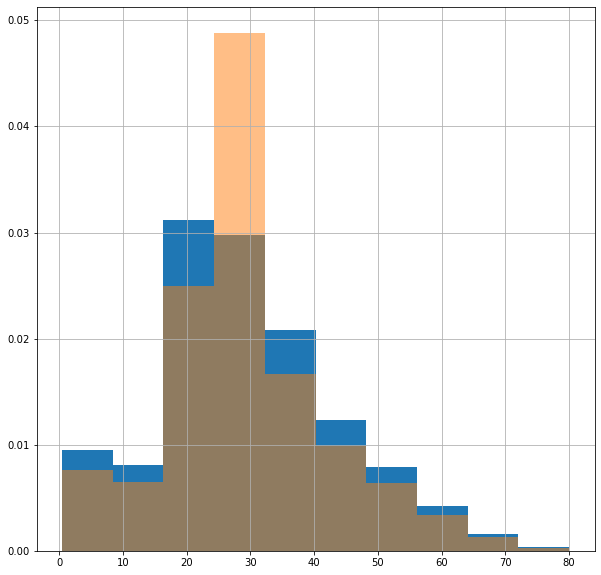

In [72]:
plt.figure(figsize=(10,10))
ax=train_df.Age.hist(bins=10,density=True,alpha=1)
ax=train_data.Age.hist(bins=10,density=True,alpha=0.5)


<AxesSubplot:ylabel='Density'>

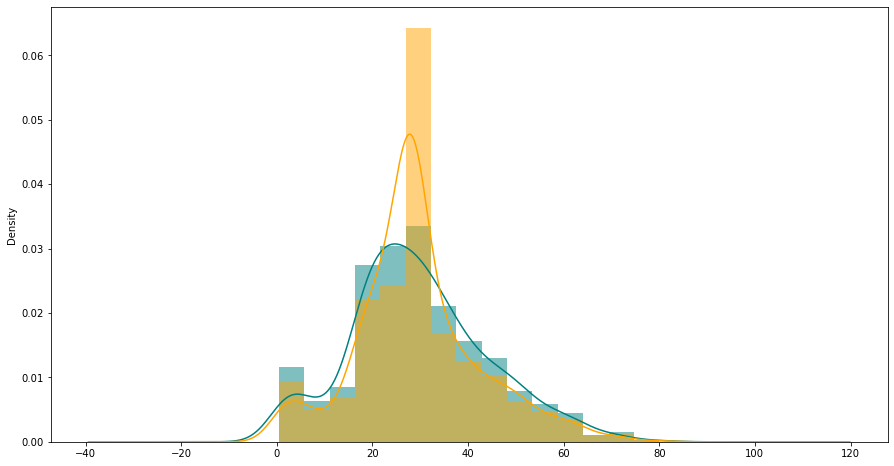

In [17]:
# more eda on age
plt.figure(figsize=(15,8))
ax=train_df.Age.hist(bins=15,density=True,stacked=True,color="teal",alpha=0.5)
train_df.Age.plot(kind="density",color="teal")
ax=train_data.Age.hist(bins=15,density=True,stacked=True,color="orange",alpha=0.5)
train_data.Age.plot(kind="density",color="orange")


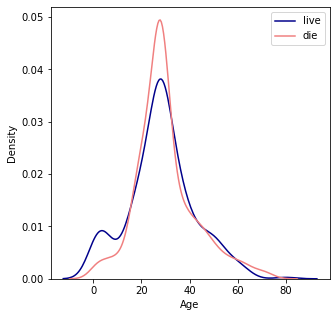

In [77]:
# bivariante analysis  (output ,feature)
# continous variable 
plt.figure(figsize=(5,5))
ax=sns.kdeplot(final_train['Age'][final_train['Survived']==1],color='darkblue')
ax=sns.kdeplot(final_train['Age'][final_train['Survived']==0],color='lightcoral')
plt.legend(['live','die'])

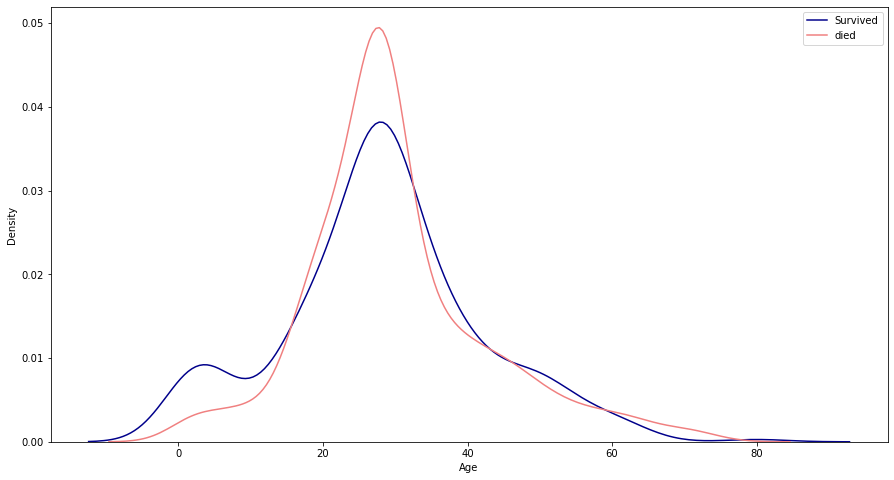

In [18]:
plt.figure(figsize=(15,8))
ax=sns.kdeplot(final_train["Age"][final_train["Survived"]==1],color="darkblue")
sns.kdeplot(final_train["Age"][final_train["Survived"]==0],color="lightcoral")
plt.legend(["Survived","died"])

In [86]:
final_train.head()

,Survived,Age,Fare,Not_Alone,Pclass_1,Pclass_2,Pclass_3,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_category,fare_category
0,0,22.0,7.2500,1,0,0,1,1,0,0,1,0,1
1,1,38.0,71.2833,1,1,0,0,0,1,0,0,0,0
2,1,26.0,7.9250,0,0,0,1,0,0,0,1,0,1
3,1,35.0,53.1000,1,1,0,0,0,0,0,1,0,0
4,0,35.0,8.0500,0,0,0,1,1,0,0,1,0,1


In [85]:
def fare_cat(fare):
    if fare<=50:
        return 1
    else:
        return 0
final_train['fare_category']=final_train['Fare'].apply(fare_cat)
final_test['fare_category']=final_test['Fare'].apply(fare_cat)


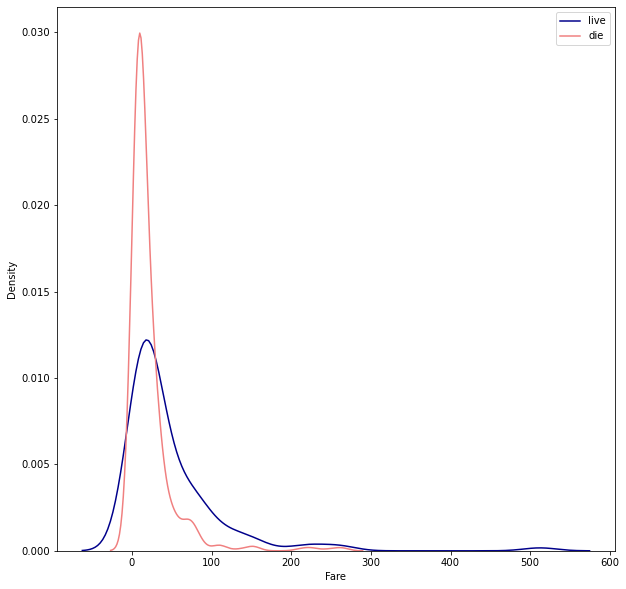

In [81]:
plt.figure(figsize=(10,10))
ax=sns.kdeplot(final_train["Fare"][final_train["Survived"]==1],color="darkblue")
ax=sns.kdeplot(final_train["Fare"][final_train["Survived"]==0],color="lightcoral")
ax.legend(['live','die'])

In [19]:
final_train["Age_category"]=np.where((final_train.Age)<=18,1,0)
final_test["Age_category"]=np.where((final_test.Age)<=18,1,0)



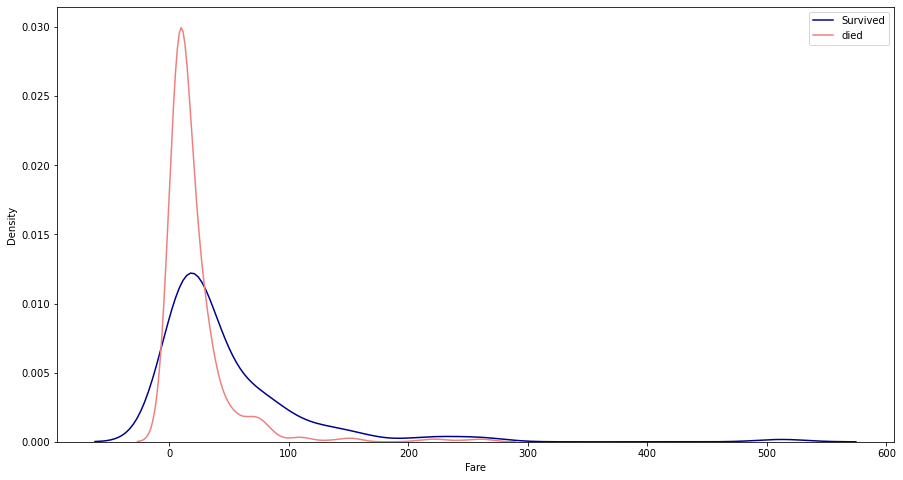

In [20]:
plt.figure(figsize=(15,8))
ax=sns.kdeplot(final_train["Fare"][final_train["Survived"]==1],color="darkblue")
sns.kdeplot(final_train["Fare"][final_train["Survived"]==0],color="lightcoral")
plt.legend(["Survived","died"])

In [92]:
final_train.describe()

,Survived,Age,Fare,Not_Alone,Pclass_1,Pclass_2,Pclass_3,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_category,fare_category
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,29.361582,32.204208,0.397306,0.242424,0.206510,0.551066,0.647587,0.188552,0.086420,0.722783,0.112233,0.820426
std,0.486592,13.019697,49.693429,0.489615,0.428790,0.405028,0.497665,0.477990,0.391372,0.281141,0.447876,0.315831,0.384047
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,28.000000,14.454200,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,35.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,80.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


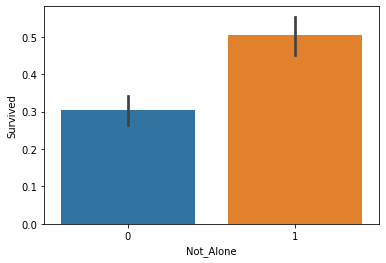

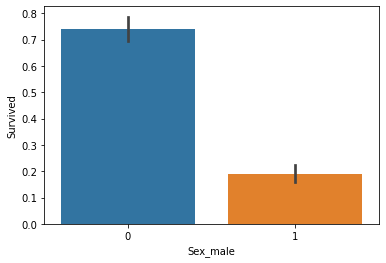

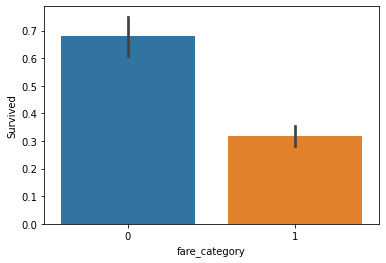

In [95]:
cat=["Not_Alone",'Sex_male','fare_category']
for i in cat:
    sns.barplot(x=i,y="Survived",data=final_train)
    plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

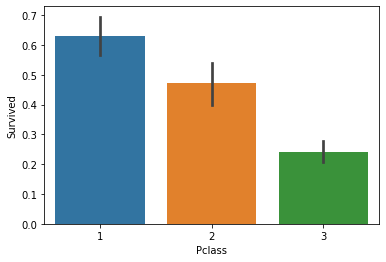

In [21]:
sns.barplot(x="Pclass",y="Survived",data=train_df)

<AxesSubplot:xlabel='Alone', ylabel='Survived'>

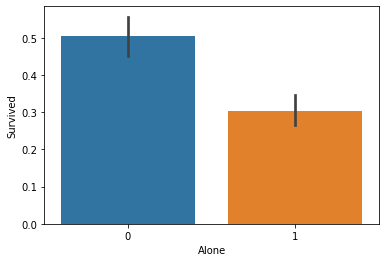

In [22]:
sns.barplot(x="Alone",y="Survived",data=final_train)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

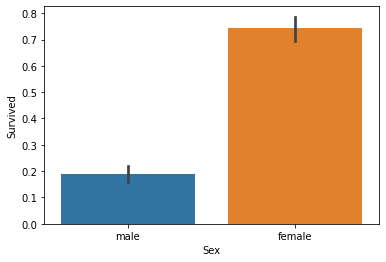

In [23]:
sns.barplot(x="Sex",y="Survived",data=train_df)

In [27]:
final_train.head()

,Survived,Age,Fare,Alone,Pclass_1,Pclass_2,Pclass_3,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_category
0,0,22.0,7.2500,0,0,0,1,1,0,0,1,0
1,1,38.0,71.2833,0,1,0,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,1,0,0,1,0


In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score


In [97]:
final_train.columns

Index(['Survived', 'Age', 'Fare', 'Not_Alone', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Age_category', 'fare_category'],
      dtype='object')

In [98]:
cols=[ 'Age', 'Fare', 'Not_Alone', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Age_category', 'fare_category']
X=final_train[cols]
y=final_train['Survived']
model=LogisticRegression()


In [30]:
cols=["Age","Fare","Alone","Pclass_1","Pclass_2","Pclass_3",'Sex_male',"Embarked_S","Embarked_Q","Embarked_C","Age_category"]
X=final_train[cols]
y=final_train["Survived"]
model=LogisticRegression()
rfe=RFE(model,8)
rfe.fit(X,y)
print(list(X.columns[rfe.support_]))

['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_male', 'Embarked_S', 'Embarked_Q', 'Embarked_C', 'Age_category']


C:\Users\Hassan\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=8 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\Hassan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hassan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.


<AxesSubplot:>

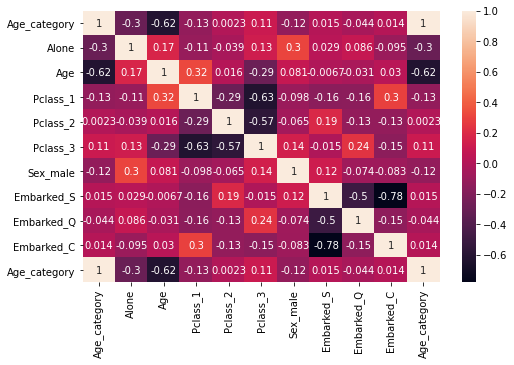

In [39]:
selected_features=["Age_category","Alone","Age",'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_male', 'Embarked_S', 'Embarked_Q', 'Embarked_C', 'Age_category']
X=final_train[selected_features]
plt.subplots(figsize=(8,5))

sns.heatmap(X.corr(),annot=True)

In [106]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=5)
model.fit(X_train,y_train)
model_pred=model.predict(X_train)
print(model.score(X_train,y_train))


0.7994011976047904


C:\Users\Hassan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [122]:
cols

['Age',
 'Fare',
 'Not_Alone',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Age_category',
 'fare_category']

In [137]:
# split data train ,test
from sklearn.model_selection import train_test_split


from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score 
# define input features
X=final_train[cols]
# define target output
y=final_train["Survived"]
# split dataset train test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=7)

# define the model 
from sklearn.linear_model import LogisticRegression
# object from model
model=LogisticRegression()

# feed the algorithm with data  (X_train,y_train)
model.fit(X_train,y_train)


# train prediction
model_pred=model.predict(X_train)

print('train accuracy',model.score(X_train,y_train))


# test prediction
y_pred=model.predict(X_test)
confusion=confusion_matrix(y_test,y_pred)
print(confusion)
names=['not survived','survived']
print(classification_report(y_test,y_pred))



train accuracy 0.811377245508982
[[111  24]
 [ 32  56]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       135
           1       0.70      0.64      0.67        88

    accuracy                           0.75       223
   macro avg       0.74      0.73      0.73       223
weighted avg       0.75      0.75      0.75       223



C:\Users\Hassan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [107]:
y_pred=model.predict(X_test)
confusion=confusion_matrix(y_test,y_pred)
confusion

array([[125,  15],
       [ 27,  56]], dtype=int64)

In [41]:
cnf_matrix=confusion_matrix(y_train,model_pred)
print("LR confusion matrix")
print(cnf_matrix)

LR confusion matrix
[[377  62]
 [ 77 196]]


In [117]:
(140/223)*(0.89)+(83/223)*(0.67)

0.8081165919282511

In [113]:
names=['not Survived','survived']
print(classification_report(y_test,y_pred,target_names=names))

              precision    recall  f1-score   support

not Survived       0.82      0.89      0.86       140
    survived       0.79      0.67      0.73        83

    accuracy                           0.81       223
   macro avg       0.81      0.78      0.79       223
weighted avg       0.81      0.81      0.81       223



In [148]:
def report_to_df(report):
    report = [x.split(' ') for x in report.split('\n')]
    header = ['Class Name']+[x for x in report[0] if x!='']
    values = []
    for row in report[1:-5]:
        row = [value for value in row if value!='']
        if row!=[]:
            values.append(row)
    df = pd.DataFrame(data = values, columns = header)
    return df

    class_names=["Survived","Died"]
print("\n")
print("Classification report for logistic regression")
report=classification_report(y_train,model_pred,target_names=class_names)
report_df = report_to_df(report)
report_df.to_csv('report')



Classification report for logistic regression


In [138]:
from sklearn.neighbors import KNeighborsClassifier
# X=final_train[cols]
# y=final_train["Survived"]
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7)
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
model_pred=model.predict(X_train)
print(model.score(X_train,y_train))

0.8398203592814372


In [120]:
cnf_matrix=confusion_matrix(y_train,model_pred)
print("KNN confusion matrix")
print(cnf_matrix)

KNN confusion matrix
[[391  48]
 [ 71 202]]


In [175]:
(1/2)*(1)+(1/2)*(0)

0.5

In [121]:
class_names=["Survived","Died"]
print("\n")
print("Classification report for KNN")
print(classification_report(y_train,model_pred,target_names=class_names))



Classification report for KNN
              precision    recall  f1-score   support

    Survived       0.85      0.89      0.87       439
        Died       0.81      0.74      0.77       273

    accuracy                           0.83       712
   macro avg       0.83      0.82      0.82       712
weighted avg       0.83      0.83      0.83       712



In [156]:
from sklearn.tree import DecisionTreeClassifier

In [157]:
model=DecisionTreeClassifier()

In [158]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [159]:
=model.predict(X_train)

In [160]:
model.score(X_train,y_train)

0.9850299401197605

In [161]:
y_pred=model.predict(X_test)

In [162]:
confusion=confusion_matrix(y_test,y_pred)

In [163]:
print(confusion)

[[110  25]
 [ 29  59]]


In [164]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       135
           1       0.70      0.67      0.69        88

    accuracy                           0.76       223
   macro avg       0.75      0.74      0.74       223
weighted avg       0.76      0.76      0.76       223



In [171]:
confusion_matrix(y_train,model_pred)

array([[414,   0],
       [ 10, 244]], dtype=int64)

In [172]:
print(classification_report(y_train,model_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       414
           1       1.00      0.96      0.98       254

    accuracy                           0.99       668
   macro avg       0.99      0.98      0.98       668
weighted avg       0.99      0.99      0.98       668



In [ ]:
# read dataset
# EDA "univariate analysis"  impute missing ,determine undesirable features
# feature continous hist
# feature categorical countplot
# Feature extraction

# impute dataset

# EDA 'bivariate analysis' "target" 
# Feature continous ==> kdeplot
# feature categorical ==> barplot

# split data ==> train test split
# select model 

# measure performance of models 

